In [4]:
import requests
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

# Ask user for today's date (DD MM YYYY format)
#day = int(input("Enter today's day (DD): "))
#month = int(input("Enter today's month (MM): "))
#year = int(input("Enter today's year (YYYY): "))

# Convert to date object
#today_date = datetime.date(year, month, day)
today_date = datetime.date(2025, 2, 14)

# Calculate start date (7 days before today)
start_date = today_date - datetime.timedelta(days=7)

# Define location (Coimbatore, India)
latitude = "11.0168"
longitude = "76.9558"

# Open-Meteo API URL for historical weather
url = f"https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={today_date}&daily=temperature_2m_max,temperature_2m_min,wind_speed_10m_max,shortwave_radiation_sum&timezone=auto"

# Fetch data from API
response = requests.get(url)
data = response.json()

In [6]:
time = data['daily']['time']
temp_max = data['daily']['temperature_2m_max']
temp_min = data['daily']['temperature_2m_min']
rad = data['daily']['shortwave_radiation_sum']
df = pd.DataFrame({'Timestamp':time,'Max Temp':temp_max,'Min Temp':temp_min,'Radiation':rad})
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp',inplace=True)
df

,Max Temp,Min Temp,Radiation
Timestamp,,,
2025-02-07,32.0,20.5,24.02
2025-02-08,31.8,20.1,23.83
2025-02-09,31.9,21.6,23.63
2025-02-10,31.6,21.4,22.69
2025-02-11,31.9,20.5,23.16
2025-02-12,33.6,20.8,23.88
2025-02-13,34.0,21.2,24.50
2025-02-14,34.3,21.5,24.78


<Axes: xlabel='Timestamp'>

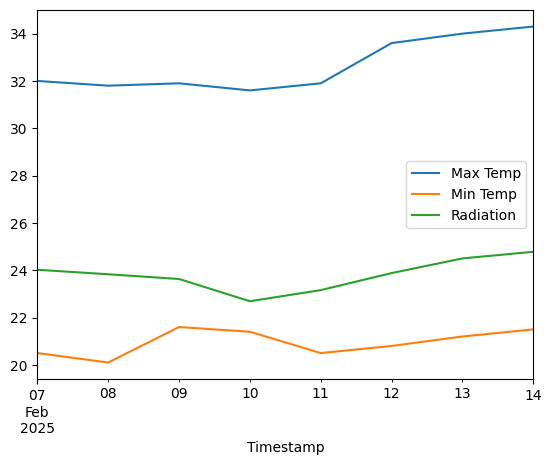

In [7]:
df.plot()

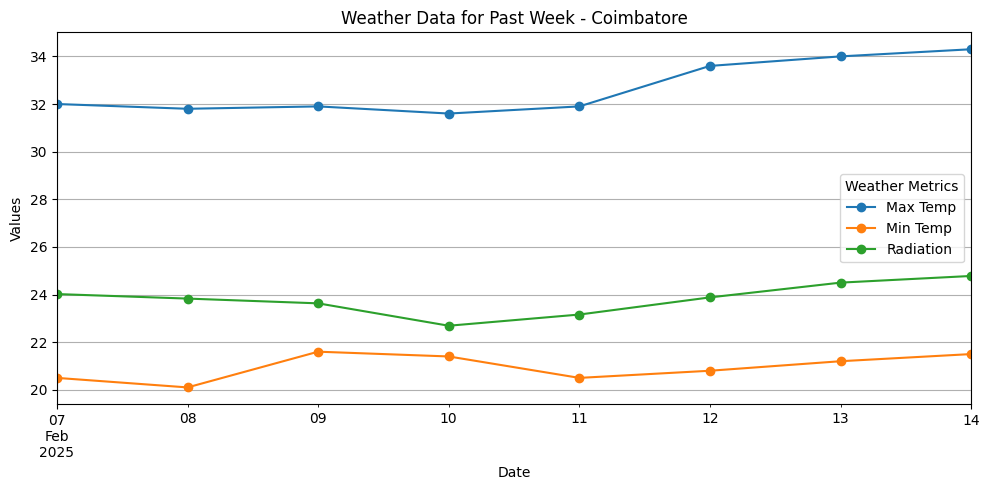

In [ ]:
import matplotlib.pyplot as plt

df.index = pd.to_datetime(df.index)
df.plot(kind='line', marker='o', figsize=(10, 5))

plt.title("Weather Data for Past Week - Coimbatore")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(title="Weather Metrics")
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
print(df.columns)


Index(['Max Temp', 'Min Temp', 'Radiation'], dtype='object')
